In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Issues : want to classify adaquate pea & bad pea

# Already knows equation : $ x - 2y + 10 = 0$

In [7]:
n = 1000
x_pea = np.random.uniform(0, 40, n)
y_pea = np.random.uniform(0, 30, n)
# is_grown = np.array((x_pea - 2*y_pea + 10) > 0, dtype=bool)
is_grown = np.array((x_pea - 2*y_pea + 10) > 0, dtype=int)
print(is_grown.shape)
is_grown[:20]

(1000,)


array([0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])

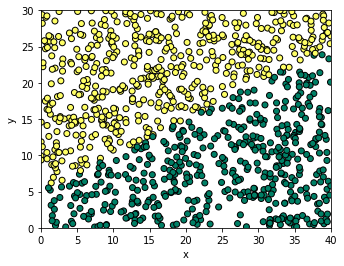

In [15]:
plt.axes(aspect=1, xlim=(0,40), ylim=(0,30), xlabel='x', ylabel='y')
plt.scatter(x_pea, y_pea, c=is_grown, cmap='summer_r', edgecolors='k')
plt.show() # green = grown, yellow = not grown

# Find equation if doesn't know before

In [16]:
# save array first
np.savez('pea-data.npz', x=x_pea, y=y_pea, z=is_grown)
# use np.load() to retrieve data

## $ f(x,y) = ax + by + c $
### finally result should fit $ \quad ^b/_a = -2,  \: ^c/_a=10$ 

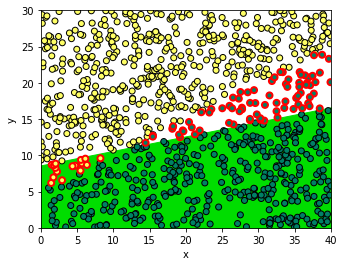

ทายถูกทั้งหมด 905 จาก 1000


In [42]:
# random initail value
a, b, c = 3, -15, 129.3

data = np.load('pea-data.npz')
x_pea = data['x']
y_pea = data['y']
is_grown = data['z']

grown_predict = np.array(a*x_pea + b*y_pea + c > 0, dtype=int)
# compare y_test, y_predict
is_true = np.array(is_grown == grown_predict, dtype=int)

x_lines = np.array([0, 40])
# from f = ax+by+c = 0  ==> y = -(c+ax)/b
y_lines = -(c + a*x_lines) / b 

plt.axes(aspect=1, xlim=(0,40), ylim=(0,30), xlabel='x', ylabel='y')
plt.fill_between(x_lines, y_lines, color='#00dd00') # green area

# True predicted values
plt.scatter(x_pea[is_true==1], y_pea[is_true==1], c=is_grown[is_true==1],
           edgecolors='k', cmap='summer_r')
# False predicted values
plt.scatter(x_pea[is_true==0], y_pea[is_true==0], c=is_grown[is_true==0],
           edgecolors='r', cmap='summer_r', lw=2)

plt.show() # green = grown, yellow = not grown
print('ทายถูกทั้งหมด %d จาก 1000'%is_true.sum())

# In general we use SSE ( cost or loss or whatever ) to sharpen model

In [44]:
((is_true - is_grown) ** 2)[:10]

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0])

In [47]:
sse = ((is_true - is_grown) ** 2).sum() # sum of squared error
print('SSE : {}'. format(sse))

SSE : 580


### But *Step funcion* is too rough function
# Better use **Sigmoid** function which more compromising

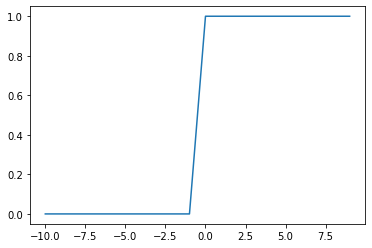

In [86]:
x = np.arange(-10, 10, 1)
y = np.array(x > x.mean(), dtype=int)
plt.plot(x,y)

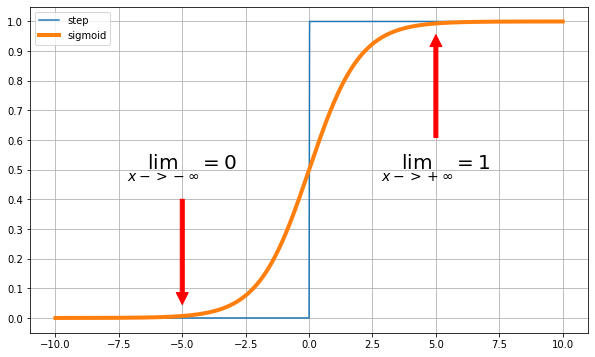

In [85]:
def sigmoid(x):
    return 1/(1+ np.exp(-x))
x = np.linspace(-10, 10, 1001)

plt.figure(figsize=(10, 6))

# Linear
plt.axes(yticks=np.linspace(0, 1 , 11))
plt.plot(x, x>0, label='step')

# Sigmoid
plt.plot(x, sigmoid(x), lw=4, label='sigmoid')
tex1 = '$\lim_{x -> -\infty} = 0$'
plt.annotate(tex1, xy=(-5, 0), xytext=(-5, 0.5), 
             arrowprops={'color':'red', 'shrink':0.1}, fontsize=20,
            ha='center')
tex2 = '$\lim_{x -> +\infty} = 1$'
plt.annotate(tex2, xy=(+5, 1), xytext=(+5, 0.5), 
             arrowprops={'color':'red', 'shrink':0.1}, fontsize=20,
            ha='center')

plt.legend()
plt.grid()
plt.show()

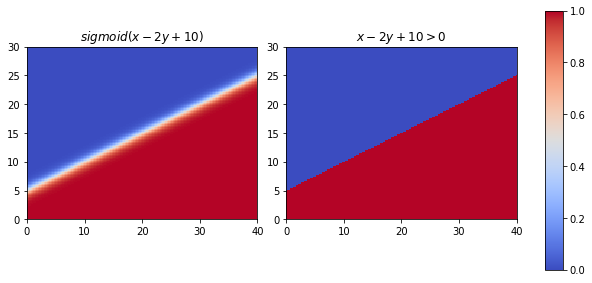

In [115]:
x, y = np.meshgrid(np.linspace(0, 40, 160) ,
                  np.linspace(0, 30, 120))
plt.figure(figsize=(8,4))
# react [x_ini, y_ini, w, h]
plt.axes([0.05, .03,.4,.95], aspect=1, title='$sigmoid(x-2y+10)$',
        xlim=(0,40), ylim=(0,30))
plt.pcolormesh(x, y, sigmoid(x-2*y+10), cmap='coolwarm')

plt.axes([0.5, .03,.4,.95], aspect=1, title='$x-2y+10 > 0$',
        xlim=(0,40), ylim=(0,30))
plt.pcolormesh(x, y, (x-2*y+10)>0, cmap='coolwarm')

plt.colorbar(cax=plt.axes([0.95, 0.03, 0.03, .9]))
plt.show()

### In this context Sigmoid function is **Activation function**
![activation funcs](https://miro.medium.com/max/1400/1*RD0lIYqB5L2LrI2VTIZqGw.png)
[read more](https://medium.com/mmp-li/deep-learning-%E0%B9%81%E0%B8%9A%E0%B8%9A%E0%B8%89%E0%B8%9A%E0%B8%B1%E0%B8%9A%E0%B8%AA%E0%B8%B2%E0%B8%A1%E0%B8%B1%E0%B8%8D%E0%B8%8A%E0%B8%99-ep-2-optimization-activation-function-%E0%B9%80%E0%B8%A3%E0%B8%B5%E0%B8%A2%E0%B8%99%E0%B8%81%E0%B8%B1%E0%B8%99%E0%B8%AA%E0%B8%9A%E0%B8%B2%E0%B8%A2%E0%B9%86%E0%B8%AA%E0%B9%84%E0%B8%95%E0%B8%AA%E0%B9%8C%E0%B8%8A%E0%B8%B4%E0%B8%A5%E0%B9%86-9feb5a87e3b2)

## Now change from Step function $ \to $ Sigmoid function

In [118]:
is_grown = sigmoid(a*x_pea + b*y_pea + c)

In [120]:
# cal sse again
sse = ((is_true - is_grown) ** 2).sum()
sse

516.520689993669

### SSE is from ...
## $$ \begin{align}  
J = \dfrac{1}{2} \sum_{i=1}^{n} (z_i - \phi_i) ^2
\end{align}$$

### $ z_i \in \{0,1\} $ 
### $ \phi_i = sigmoid = \dfrac{1}{1+e^{-f(x_i)}}$
### $ \begin{align}
f(x_i) = decision\, function = \sum_{j=1}^m = w_j x_ij + w_0 
\end{align}$

now we will define : $a=w_1, \, b=w_2,\, c=w_0$
### after crazy calculus II
$ \begin{align}
\Delta w_x = -\eta\frac{\partial J}{\partial w_x} = 2\eta\sum_{i=1}^{n}\phi_{(i)}(1-\phi_{(i)})(z_{(i)}-\phi_{(i)})x_{(i)} \\
\Delta w_y = -\eta\frac{\partial J}{\partial w_y} = 2\eta\sum_{i=1}^{n}\phi_{(i)}(1-\phi_{(i)})(z_{(i)}-\phi_{(i)})y_{(i)} \\
\Delta w_0 = -\eta\frac{\partial J}{\partial w_0} = 2\eta\sum_{i=1}^{n}\phi_{(i)}(1-\phi_{(i)})(z_{(i)}-\phi_{(i)})
\end{align}
$
#### we will use this equation in code

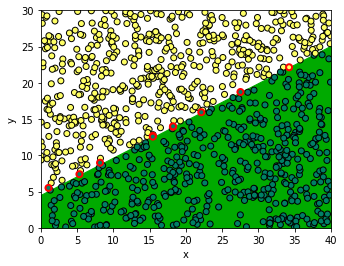

ได้สมการเส้นแบ่งเขตเป็น 0.543x-1.057y+4.829 = 0
ทายถูกทั้งหมด 990 จาก 1000


In [144]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
eta = 0.0001
n_learns = 10000

data = np.load('pea-data.npz')
x_pea = data['x']
y_pea = data['y']
is_grown = data['z'] # ngokmai

# init val
wx, wy, w0 = 0,0,0
# init predict
grown_predict = sigmoid(wx*x_pea + wy*y_pea + w0)
# prepare for each sse
sse = []
correct_predict = []

# iterate and adjust weight
for i in range(n_learns):
    eee = 2 * grown_predict * (1-grown_predict) * \
        (is_grown - grown_predict)
    wx += (eee * x_pea).sum() * eta
    wy += (eee * y_pea).sum() * eta
    w0 += eee.sum() * eta
    
    # activattion fn
    grown_predict = sigmoid(wx*x_pea + wy*y_pea + w0)
    # cal sse => append to list
    sse += [((grown_predict - is_grown)**2).sum()]
     
    is_true = np.array(np.abs(grown_predict - is_grown) < 0.5)
    
    correct_predict += [is_true.sum()]
    
x_lines = np.array([0, 40])
y_lines = -(w0 + wx*x_lines) / wy
plt.axes(aspect=1, xlim=(0,40), ylim=(0,30), xlabel='x', ylabel='y')
plt.fill_between(x_lines, y_lines, color='#00aa00')

plt.scatter(x_pea[is_true==1], y_pea[is_true==1], c=is_grown[is_true==1],
           edgecolors='k', cmap='summer_r')
plt.scatter(x_pea[is_true==0], y_pea[is_true==0], c=is_grown[is_true==0],
           edgecolors='r', cmap='summer_r', lw=2)

plt.show() # green = grown, yellow = not grown
print('ได้สมการเส้นแบ่งเขตเป็น %.3fx%+.3fy%+.3f = 0'%(wx,wy,w0))
print('ทายถูกทั้งหมด %d จาก 1000'%is_true.sum())

# Plot SSE & correct prediction( times)

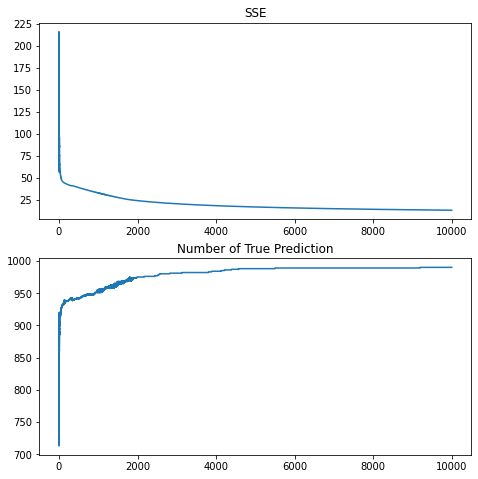

In [153]:
ax = plt.subplot(211)
ax.set_title('SSE')
plt.plot(sse)

ax = plt.subplot(212)
ax.set_title('Number of True Prediction')
plt.plot(correct_predict)

plt.subplots_adjust(0, 0, 1, 1.5)
plt.show()

# Resuable class

In [161]:
class LogisticRegression2d:
    def __init__(self, eta):
        self.eta = eta
    def learn(self, x, y, z, n_learns):
        self.sse = []
        self.correct_prediction = []
        # initital weight
        self.wx, self.wy, self.w0 = 0,0,0
        
        phi = self.cal_sigmoid(x, y)
        for i in range(n_learns):
            # adjust weights
            eee = 2 * phi * (1-phi) * (z-phi)
            self.wx += (eee*x_pea).sum() * self.eta
            self.wy += (eee*y_pea).sum() * self.eta
            self.w0 += eee.sum() * self.eta
            phi = self.cal_sigmoid(x, y)
            
            # append data
            is_true = np.abs(phi-z) < 0.5
            self.correct_prediction += [is_true.sum()]
            self.sse += [ self.cal_sse(x,y,z)]
    def predict(self, x, y):
        return self.cal_sigmoid(x, y) > 0.5
    def cal_sigmoid(self, x, y):
        return sigmoid(self.wx*x + self.wy*y + self.w0)
    def cal_sse(self, x, y, z):
        return ((z-self.cal_sigmoid(x, y) ** 2).sum())

In [162]:
data = np.load('pea-data.npz')
x_pea = data['x']
y_pea = data['y']
is_grown = data['z'] # ngokmai

model = LogisticRegression2d(eta=0.00001)
model.learn(x_pea, y_pea, is_grown, n_learns=10000)


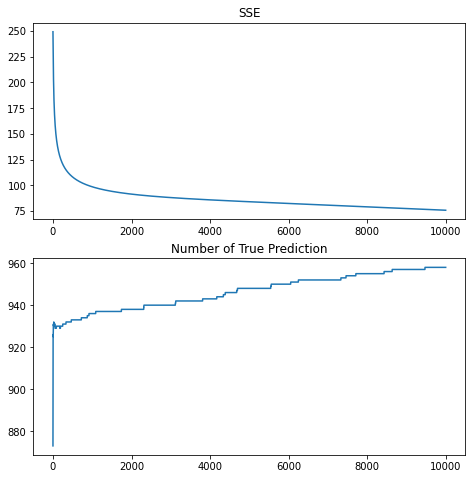

In [164]:
ax = plt.subplot(211)
ax.set_title('SSE')
plt.plot(model.sse)

ax = plt.subplot(212)
ax.set_title('Number of True Prediction')
plt.plot(model.correct_prediction)

plt.subplots_adjust(0, 0, 1, 1.5)
plt.show()

In [166]:
print('ได้สมการเส้นแบ่งเขตเป็น %.3fx%+.3fy%+.3f = 0'%(model.wx,model.wy,model.w0))


ได้สมการเส้นแบ่งเขตเป็น 0.333x-0.561y+1.260 = 0


# Model which $N_{features} \geq 2$

In [169]:
class LogisticRegression:
    def __init__(self, eta):
        self.eta = eta
    def learn(self, X, z, n_learns):
        self.sse = []
        self.correct_prediction = []
        # np.zeros like, [0,0,0]
        self.w = np.zeros(X.shape[1] + 1) # +1 is represented as w_0
        
        phi = self.cal_sigmoid(X)
        for i in range(n_learns):
            eee = 2 * phi * (1-phi) * (z-phi)
            self.w[1:] += np.dot(X.T, eee) * self.eta
            self.w[0] +=eee.sum() * self.eta
            phi = self.cal_sigmoid(X)
            is_true = np.abs(phi-z) < 0.5
            self.correct_prediction += [ is_true.sum()]
            self.sse += [self.cal_sse(X, z)]
    def predict(self, X):
        return self.cal_sigmoid(X) > 0.5
    def cal_sigmoid(self, X):
        def sigmoid(x):
            return 1/(1+np.exp(-x))
        return sigmoid(np.dot(X, self.w[1:]) + self.w[0])
    def cal_sse(self, X, z):
        return ((z-self.cal_sigmoid(X)) ** 2).sum()

# use this class
data = np.load('pea-data.npz')
x_pea = data['x']
y_pea = data['y']
is_grown = data['z']

model = LogisticRegression(eta=0.00001)
xy_pea = np.stack([x_pea, y_pea], axis=1)

model.learn(xy_pea, is_grown, n_learns=10000)
print('ได้สมการเส้นแบ่งเขตเป็น %.3fx%+.3fy%+.3f = 0'%(model.w[1],model.w[2],model.w[0]))
print('ทายถูกทั้งหมด %d จาก %d'%(model.correct_prediction[-1],
                                 len(is_grown)))
        
        

ได้สมการเส้นแบ่งเขตเป็น 0.333x-0.561y+1.260 = 0
ทายถูกทั้งหมด 958 จาก 1000


# $$ \eta$$

[1.e-02 1.e-03 1.e-04 1.e-05 1.e-06 1.e-07 1.e-08]


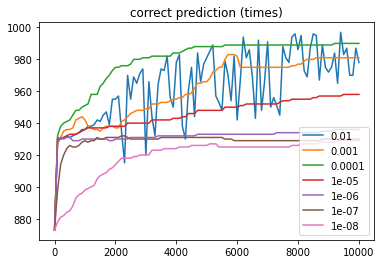

In [188]:
plt.title('correct prediction (times)')
t = 9
k = np.arange(2, t, 1)
v = 10 ** k
print(1/v)
for eta in 1/v:
    model = LogisticRegression(eta)
    model.learn(xy_pea, is_grown, n_learns=10001)
    plt.plot(np.arange(0,10001, 100), model.correct_prediction[::100],
            label='{}' .format(eta.round(t)) )
    plt.legend(loc=0)
plt.show()